# 环境准备

In [1]:
%%time
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.width", 1000)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
%matplotlib inline

Wall time: 936 ms


# 数据准备

In [2]:
%%time
train = pd.read_csv("../xfdata/train.csv", header =None,delimiter='\t', names=['sentence1', 'sentence2', 'label'])
test = pd.read_csv("../xfdata/test.csv", header =None,delimiter='\t', names=['sentence1', 'sentence2', 'label'])
submit = pd.read_csv("../xfdata/sample_submit.csv")

Wall time: 110 ms


# EDA

## 查看数据

In [3]:
train.head()

,sentence1,sentence2,label
0,藏獒为什么这么贵,藏獒见人不咬为什么,0
1,人生应该怎么才算精彩？,人生要怎么过才算精彩啊,1
2,为什么打牌老是输,为什么我枪神纪进不去了,0
3,现在网上卖什么最赚钱,网上卖什么最赚钱,1
4,如何提高气质,怎样提高自身气质？,1


## 查看最大长度

In [4]:
%%time
train['sentence1_len'] = train['sentence1'].apply(lambda x: len(x))
train['sentence2_len'] = train['sentence2'].apply(lambda x: len(x))

test['sentence1_len'] = test['sentence1'].apply(lambda x: len(x))
test['sentence2_len'] = test['sentence2'].apply(lambda x: len(x))

print("训练集句子1的最大长度：", train['sentence1_len'].max())
print("训练集句子2的最大长度：", train['sentence2_len'].max())
print("测试集句子1的最大长度：", test['sentence1_len'].max())
print("测试集句子1的最大长度：", test['sentence2_len'].max())

训练集句子1的最大长度： 49
训练集句子2的最大长度： 131
测试集句子1的最大长度： 49
测试集句子1的最大长度： 45
Wall time: 41.3 ms


## 长度可视化

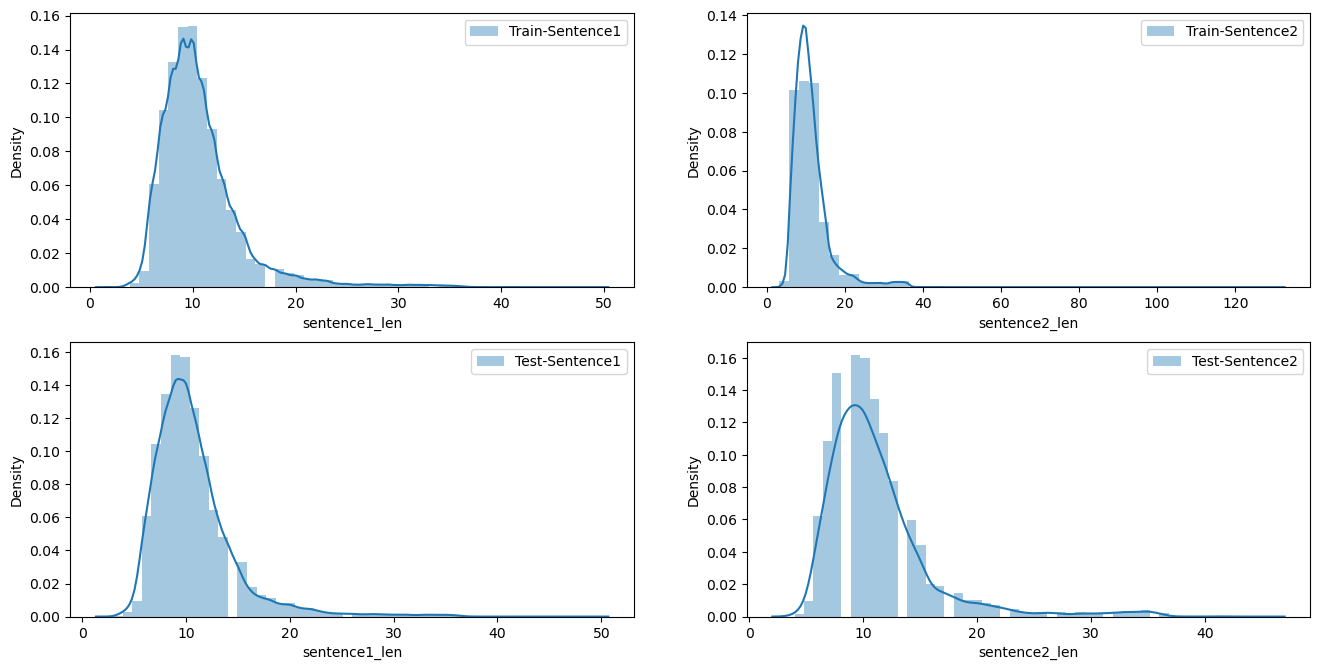

In [5]:
plt.figure(figsize=(16, 8), dpi=100)

plt.subplot(2, 2, 1)
sns.distplot(train['sentence1_len'], label='Train-Sentence1')
plt.legend()
plt.subplot(2, 2, 2)
sns.distplot(train['sentence2_len'], label='Train-Sentence2')
plt.legend()
plt.subplot(2, 2, 3)
sns.distplot(test['sentence1_len'], label='Test-Sentence1')
plt.legend()
plt.subplot(2, 2, 4)
sns.distplot(test['sentence2_len'], label='Test-Sentence2')
plt.legend()

plt.savefig('../figure/sentence_len.png')